### Import Data
Import data and conduct preliminary EDA before data cleaning

KNOW:
- all data is from health clinics in Vitoria, Espirito de Santos, Brazil
- public sector appointments

<br>
DON'T KNOW:<br>
- if this is representative of all appointments that are made in this time frame
- specialty or primary vs specialty care

source: https://www.kaggle.com/joniarroba/noshowappointments

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import pickle

%matplotlib inline
plt.style.use('seaborn-pastel')

import seaborn as sns
sns.set(style="whitegrid")

%run EDA_functions.py

In [143]:
a = pd.read_csv('data/KaggleV2-May-2016.csv')

In [144]:
a.info()
a.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [145]:
a.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [146]:
a.rename({'No-show':'No_show'},axis=1,inplace=True)
a['No_show_num'] = [1 if x == 'Yes' else 0 for x in a['No_show']]

In [147]:
#clean day variables
a['SchedDay'] = [dt.datetime.strptime(x[0:10], '%Y-%m-%d') for x in a['ScheduledDay']]
a['SchedTime'] = [dt.datetime.strptime(x[11:19], '%H:%M:%S').time() for x in a['ScheduledDay']]
a['SchedDayofWeek'] = [calendar.day_name[dt.datetime.weekday(x)] for x in a['SchedDay']]

a['ApptDay'] = [dt.datetime.strptime(x[0:10], '%Y-%m-%d') for x in a['AppointmentDay']]
a['ApptDayofWeek'] = [calendar.day_name[dt.datetime.weekday(x)] for x in a['ApptDay']]

a['DayDiff'] = a['ApptDay'] - a['SchedDay']

### Preliminary EDA

In [148]:
a['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

In [149]:
a['No_show_num'].value_counts()

0    88208
1    22319
Name: No_show_num, dtype: int64

In [150]:
a['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [151]:
a['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [152]:
a['Neighbourhood'].nunique()

81

In [153]:
a['Neighbourhood'].sort_values().unique()

array(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO',
       'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA',
       'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO',
       'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA',
       'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO',
       'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO',
       'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO',
       'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI',
       'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE',
       'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI',
       'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
       'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA',
       'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH',
       'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE',
       'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ',

In [154]:
a['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [155]:
a['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [156]:
a['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [157]:
a['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [158]:
a['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [159]:
a['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [160]:
a_age = a.groupby(a['Age']).PatientId.count()
a_age

Age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: PatientId, Length: 104, dtype: int64

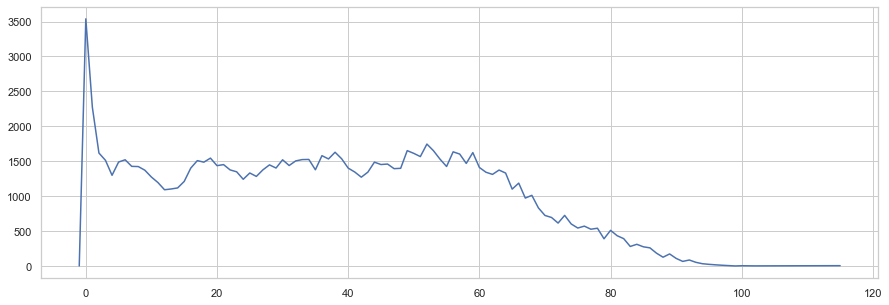

In [161]:
plt.figure(figsize=(15,5))
plt.plot(a_age.index.values,a_age);

In [162]:
a[a['Age'] < 0]
#only 1 - drop this

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No_show,No_show_num,SchedDay,SchedTime,SchedDayofWeek,ApptDay,ApptDayofWeek,DayDiff
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,...,0,0,No,0,2016-06-06,08:58:13,Monday,2016-06-06,Monday,0 days


In [163]:
a[a['Age'] == 0]
#assume these are newborns - keep

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No_show,No_show_num,SchedDay,SchedTime,SchedDayofWeek,ApptDay,ApptDayofWeek,DayDiff
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,...,0,0,No,0,2016-04-29,08:08:43,Friday,2016-04-29,Friday,0 days
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,...,0,0,No,0,2016-04-27,10:46:12,Wednesday,2016-04-29,Friday,2 days
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,...,0,1,No,0,2016-04-25,13:28:21,Monday,2016-04-29,Friday,4 days
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,...,0,0,No,0,2016-04-27,10:48:50,Wednesday,2016-04-29,Friday,2 days
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,...,0,0,No,0,2016-04-29,08:53:02,Friday,2016-04-29,Friday,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,...,0,0,No,0,2016-05-16,12:30:58,Monday,2016-06-01,Wednesday,16 days
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,...,0,0,No,0,2016-06-06,14:22:34,Monday,2016-06-08,Wednesday,2 days
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,...,0,0,No,0,2016-06-03,15:18:44,Friday,2016-06-03,Friday,0 days
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,...,0,0,No,0,2016-06-03,08:56:51,Friday,2016-06-03,Friday,0 days


In [164]:
a[a['Age'] >= 100]
#keep

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No_show,No_show_num,SchedDay,SchedTime,SchedDayofWeek,ApptDay,ApptDayofWeek,DayDiff
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,...,0,0,No,0,2016-05-03,09:14:53,Tuesday,2016-05-03,Tuesday,0 days
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,...,1,0,Yes,1,2016-05-16,09:17:44,Monday,2016-05-19,Thursday,3 days
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,...,1,0,Yes,1,2016-05-16,09:17:44,Monday,2016-05-19,Thursday,3 days
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,...,1,0,Yes,1,2016-04-08,14:29:17,Friday,2016-05-16,Monday,38 days
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,...,1,0,No,0,2016-05-30,09:44:51,Monday,2016-05-30,Monday,0 days
79270,9.739430e+12,5747809,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,...,1,0,No,0,2016-05-30,16:21:56,Monday,2016-05-31,Tuesday,1 days
79272,9.739430e+12,5747808,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,...,1,0,No,0,2016-05-30,16:21:56,Monday,2016-05-31,Tuesday,1 days
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,...,0,0,No,0,2016-05-31,10:19:49,Tuesday,2016-06-02,Thursday,2 days
92084,5.578313e+13,5670914,F,2016-05-06T14:55:36Z,2016-06-03T00:00:00Z,100,ANTÔNIO HONÓRIO,0,0,0,...,0,1,No,0,2016-05-06,14:55:36,Friday,2016-06-03,Friday,28 days
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,...,0,1,No,0,2016-05-19,07:57:56,Thursday,2016-06-03,Friday,15 days


In [165]:
a['ScheduledDay'].value_counts()

2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:17:46Z    22
2016-04-25T17:18:27Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-05T08:41:06Z     1
2016-05-10T11:53:51Z     1
2016-05-17T13:30:43Z     1
2016-03-11T11:52:28Z     1
2016-03-22T07:09:28Z     1
Name: ScheduledDay, Length: 103549, dtype: int64

In [166]:
a['ApptDay'].value_counts().sort_values()

2016-05-14      39
2016-04-29    3235
2016-05-20    3828
2016-05-06    3879
2016-05-25    3909
2016-05-13    3987
2016-05-24    4009
2016-06-03    4090
2016-05-04    4168
2016-05-03    4256
2016-05-19    4270
2016-05-05    4273
2016-05-31    4279
2016-05-10    4308
2016-06-02    4310
2016-05-17    4372
2016-05-18    4373
2016-05-02    4376
2016-05-12    4394
2016-06-07    4416
2016-06-01    4464
2016-05-11    4474
2016-06-08    4479
2016-05-30    4514
2016-05-09    4520
2016-05-16    4613
2016-06-06    4692
Name: ApptDay, dtype: int64

In [167]:
a['ApptDay'].nunique()

27

In [168]:
print("min: ",a['ApptDay'].min(),"max: ",a['ApptDay'].max())

min:  2016-04-29 00:00:00 max:  2016-06-08 00:00:00


In [169]:
a['SchedDay'].value_counts().sort_values()

2016-03-19       1
2016-01-26       1
2016-01-28       1
2016-01-04       1
2015-12-03       1
              ... 
2016-05-10    4024
2016-05-05    4095
2016-05-16    4120
2016-05-02    4216
2016-05-03    4238
Name: SchedDay, Length: 111, dtype: int64

In [170]:
a['SchedDay'].nunique()

111

In [171]:
a['DayDiff'].value_counts().sort_index()
# a lot are same day appts - what to do with these?

-6 days         1
-1 days         4
0 days      38563
1 days       5213
2 days       6725
            ...  
155 days       10
162 days       11
169 days        8
176 days       16
179 days       10
Name: DayDiff, Length: 131, dtype: int64

In [172]:
#clean data:
#drop negative ages
a = a.loc[a['Age'] >= 0]

#drop data where schedule date is later than the appointment date
a = a.loc[a['DayDiff'] >= dt.timedelta(0)]

### EDA

In [173]:
#no-show by gender
a_1 = crosstab('Gender',a)
a_1

No_show,No,Yes,All,no_p,yes_p
Gender,,,,,
F,57245,14591,71836,0.796885,0.203115
M,30962,7723,38685,0.800362,0.199638
All,88207,22314,110521,0.798102,0.201898


In [174]:


# # Draw a nested barplot to show survival for class and sex
# g = sns.catplot(x="Gender", y="PatientId", hue="No_show", data=a_1,
#                 kind="bar", palette="muted")

# g.despine(left=True)
# g.set_ylabels("counts");

In [175]:
#no-show by age
a_2 = crosstab('Age',a)
a_2

No_show,No,Yes,All,no_p,yes_p
Age,,,,,
0,2900,639,3539,0.819441,0.180559
1,1858,415,2273,0.817422,0.182578
2,1366,252,1618,0.844252,0.155748
3,1236,277,1513,0.816920,0.183080
4,1017,282,1299,0.782910,0.217090
...,...,...,...,...,...
99,1,0,1,1.000000,0.000000
100,4,0,4,1.000000,0.000000
102,2,0,2,1.000000,0.000000


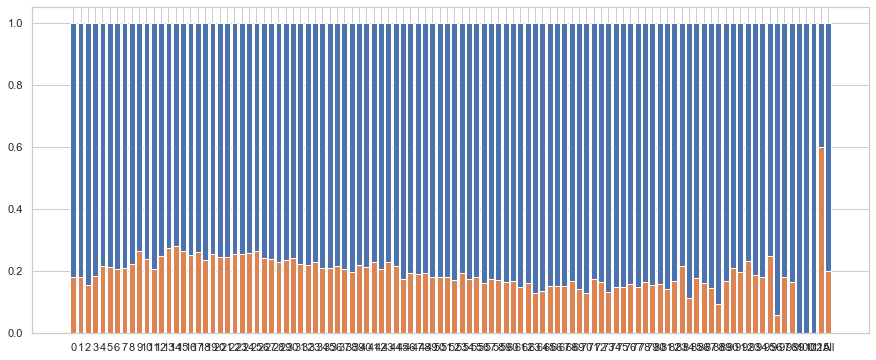

In [176]:
bargraph(a_2);

In [177]:
#no-show by appt DOW
a_3 = crosstab('ApptDayofWeek',a)
a_3

No_show,No,Yes,All,no_p,yes_p
ApptDayofWeek,,,,,
Friday,14982,4037,19019,0.787739,0.212261
Monday,18024,4689,22713,0.793554,0.206446
Saturday,30,9,39,0.769231,0.230769
Thursday,13909,3337,17246,0.806506,0.193494
Tuesday,20488,5150,25638,0.799126,0.200874
Wednesday,20774,5092,25866,0.803139,0.196861
All,88207,22314,110521,0.798102,0.201898


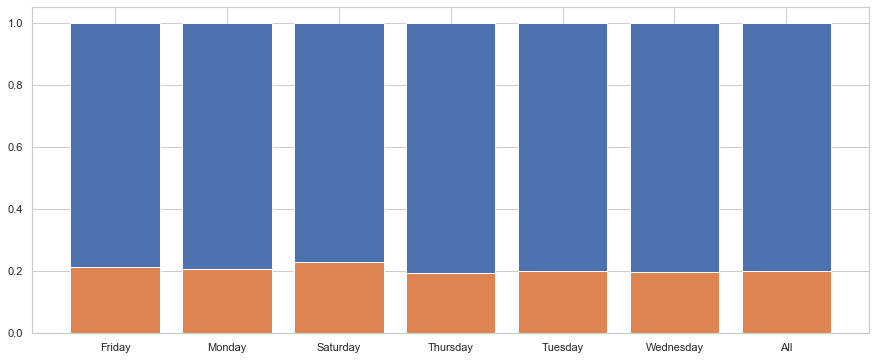

In [178]:
bargraph(a_3);

In [179]:
#no-show by scheduling DOW
a_3a = crosstab('SchedDayofWeek',a)
a_3a

No_show,No,Yes,All,no_p,yes_p
SchedDayofWeek,,,,,
Friday,15028,3887,18915,0.794502,0.205498
Monday,18523,4561,23084,0.802417,0.197583
Saturday,23,1,24,0.958333,0.041667
Thursday,14373,3699,18072,0.795319,0.204681
Tuesday,20877,5290,26167,0.797837,0.202163
Wednesday,19383,4876,24259,0.799002,0.200998
All,88207,22314,110521,0.798102,0.201898


In [180]:
#no-show by SMS received
a_4 = crosstab('SMS_received',a)
a_4

No_show,No,Yes,All,no_p,yes_p
SMS_received,,,,,
0,62509,12530,75039,0.833020,0.166980
1,25698,9784,35482,0.724255,0.275745
All,88207,22314,110521,0.798102,0.201898


In [181]:
#no-show by difference in days
a_5 = crosstab('DayDiff',a)
a_5

No_show,No,Yes,All,no_p,yes_p
DayDiff,,,,,
0 days 00:00:00,36770,1792,38562,0.953529,0.046471
1 days 00:00:00,4100,1113,5213,0.786495,0.213505
2 days 00:00:00,5123,1602,6725,0.761784,0.238216
3 days 00:00:00,2093,644,2737,0.764706,0.235294
4 days 00:00:00,4059,1231,5290,0.767297,0.232703
...,...,...,...,...,...
162 days 00:00:00,9,2,11,0.818182,0.181818
169 days 00:00:00,7,1,8,0.875000,0.125000
176 days 00:00:00,10,6,16,0.625000,0.375000


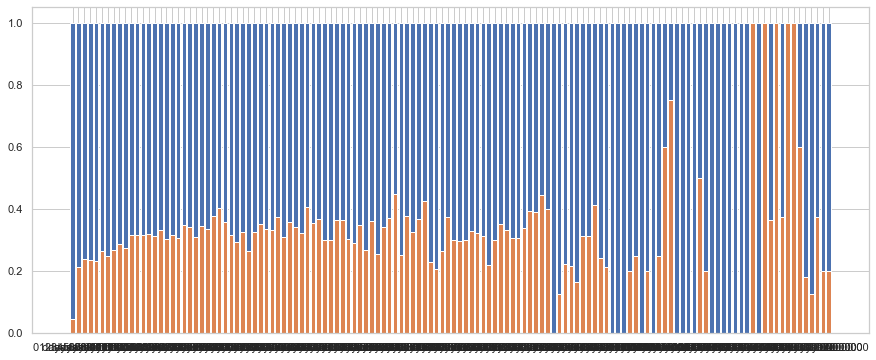

In [182]:
bargraph(a_5);

In [183]:
a_6 = crosstab("Scholarship",a)
a_6

No_show,No,Yes,All,no_p,yes_p
Scholarship,,,,,
0,79924,19736,99660,0.801967,0.198033
1,8283,2578,10861,0.762637,0.237363
All,88207,22314,110521,0.798102,0.201898


In [184]:
a_8 = crosstab("Hipertension",a)
a_8

No_show,No,Yes,All,no_p,yes_p
Hipertension,,,,,
0,70178,18542,88720,0.791005,0.208995
1,18029,3772,21801,0.826980,0.173020
All,88207,22314,110521,0.798102,0.201898


In [185]:
a_9 = crosstab("Diabetes",a)
a_9

No_show,No,Yes,All,no_p,yes_p
Diabetes,,,,,
0,81694,20884,102578,0.796409,0.203591
1,6513,1430,7943,0.819967,0.180033
All,88207,22314,110521,0.798102,0.201898


In [186]:
a_10 = crosstab("Alcoholism",a)
a_10

No_show,No,Yes,All,no_p,yes_p
Alcoholism,,,,,
0,85524,21637,107161,0.798089,0.201911
1,2683,677,3360,0.798512,0.201488
All,88207,22314,110521,0.798102,0.201898


In [187]:
a_11 = crosstab("Handcap",a)
a_11

No_show,No,Yes,All,no_p,yes_p
Handcap,,,,,
0,86373,21909,108282,0.797667,0.202333
1,1676,364,2040,0.821569,0.178431
2,146,37,183,0.797814,0.202186
3,10,3,13,0.769231,0.230769
4,2,1,3,0.666667,0.333333
All,88207,22314,110521,0.798102,0.201898


#### SMS investigation
there may be inconsistency in who gets SMS messages based on how close to the appointment date they book it. we don't know how people get chosen to get SMS (opt in?) or how many they get, or how many days before that they get SMS messages

In [188]:
#SMS by difference in days
a_7 = pd.crosstab(index=a['DayDiff'], columns=a['SMS_received'], margins=True)
a_7['no_p'] = a_7[0]/a_7['All']
a_7['yes_p'] = a_7[1]/a_7['All']
a_7

SMS_received,0,1,All,no_p,yes_p
DayDiff,,,,,
0 days 00:00:00,38562,0,38562,1.000000,0.000000
1 days 00:00:00,5213,0,5213,1.000000,0.000000
2 days 00:00:00,6725,0,6725,1.000000,0.000000
3 days 00:00:00,1831,906,2737,0.668981,0.331019
4 days 00:00:00,2236,3054,5290,0.422684,0.577316
...,...,...,...,...,...
162 days 00:00:00,11,0,11,1.000000,0.000000
169 days 00:00:00,1,7,8,0.125000,0.875000
176 days 00:00:00,3,13,16,0.187500,0.812500


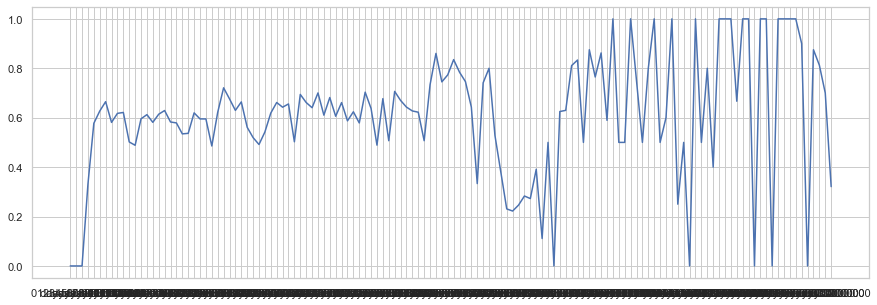

In [189]:
plt.figure(figsize=(15,5))
plt.plot(a_7.index.astype(str),a_7['yes_p']);
#the proportion of people getting SMS messages goes down when there is less time between booking and appt dates

In [190]:
# investigate SMS use when there is at least 1 day difference between bookings
#drop data where schedule date is later than the appointment date
a_8 = a.loc[a['DayDiff'] > dt.timedelta(0)]

a_8a = pd.crosstab(index=a_8['SMS_received'], columns=a_8['No_show'], margins=True)
a_8a['no_p'] = a_8a['No']/a_8a['All']
a_8a['yes_p'] = a_8a['Yes']/a_8a['All']
a_8a
#SMS received is associated with lower missed appts among the 1+ daydiff 
#will need to feature engineer this to account for that

No_show,No,Yes,All,no_p,yes_p
SMS_received,,,,,
0,25739,10738,36477,0.705623,0.294377
1,25698,9784,35482,0.724255,0.275745
All,51437,20522,71959,0.714810,0.285190


#### History of no-shows
Explore using no-show history as a feature
- complicates it if you split training/test data and put the same person in two different sets
- could consider taking the latest appt- but biases towards people who don't have prior appts

In [191]:
b = a.groupby(['PatientId'],as_index=False)["No_show_num"].agg(["sum","count"])
b.describe()

,sum,count
count,62298.000000,62298.00000
mean,0.358182,1.77407
std,0.689697,1.77023
min,0.000000,1.00000
25%,0.000000,1.00000
50%,0.000000,1.00000
75%,1.000000,2.00000
max,18.000000,88.00000


In [192]:
b.head(5)

,sum,count
PatientId,,
39217.84439,0,1
43741.75652,0,1
93779.52927,0,1
141724.16655,0,1
537615.28476,0,1


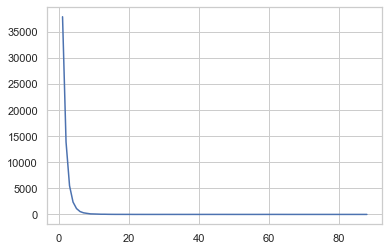

In [193]:
b1 = b.groupby(["count"]).agg({'count':'count'})
plt.plot(b1);

In [194]:
b1
#about half of the people in this dataset have at least 2 appointments

,count
count,
1,37920
2,13895
3,5499
4,2369
5,1117
6,553
7,307
8,201
9,104


In [195]:
pt = b.loc[b['count'] == 88].index
a.loc[a['PatientId'] == pt[0]].sort_values(by=['ApptDay','SchedDay','SchedTime'])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No_show,No_show_num,SchedDay,SchedTime,SchedDayofWeek,ApptDay,ApptDayofWeek,DayDiff
3006,8.221459e+14,5638995,M,2016-04-29T08:38:44Z,2016-04-29T00:00:00Z,38,REDENÇÃO,0,0,0,...,0,0,No,0,2016-04-29,08:38:44,Friday,2016-04-29,Friday,0 days
3093,8.221459e+14,5640809,M,2016-04-29T11:27:34Z,2016-04-29T00:00:00Z,38,REDENÇÃO,0,0,0,...,0,0,No,0,2016-04-29,11:27:34,Friday,2016-04-29,Friday,0 days
3060,8.221459e+14,5642878,M,2016-04-29T18:02:42Z,2016-04-29T00:00:00Z,38,REDENÇÃO,0,0,0,...,0,0,No,0,2016-04-29,18:02:42,Friday,2016-04-29,Friday,0 days
8707,8.221459e+14,5645183,M,2016-05-02T09:34:46Z,2016-05-02T00:00:00Z,38,REDENÇÃO,0,0,0,...,0,0,No,0,2016-05-02,09:34:46,Monday,2016-05-02,Monday,0 days
25428,8.221459e+14,5649058,M,2016-05-02T17:38:17Z,2016-05-02T00:00:00Z,38,REDENÇÃO,0,0,0,...,0,0,No,0,2016-05-02,17:38:17,Monday,2016-05-02,Monday,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108844,8.221459e+14,5786560,M,2016-06-08T08:35:00Z,2016-06-08T00:00:00Z,38,REDENÇÃO,0,0,0,...,0,0,No,0,2016-06-08,08:35:00,Wednesday,2016-06-08,Wednesday,0 days
108822,8.221459e+14,5788247,M,2016-06-08T11:40:27Z,2016-06-08T00:00:00Z,38,REDENÇÃO,0,0,0,...,0,0,No,0,2016-06-08,11:40:27,Wednesday,2016-06-08,Wednesday,0 days
108806,8.221459e+14,5788304,M,2016-06-08T11:46:49Z,2016-06-08T00:00:00Z,38,REDENÇÃO,0,0,0,...,0,0,No,0,2016-06-08,11:46:49,Wednesday,2016-06-08,Wednesday,0 days
98832,8.221459e+14,5789400,M,2016-06-08T14:56:42Z,2016-06-08T00:00:00Z,38,REDENÇÃO,0,0,0,...,0,0,No,0,2016-06-08,14:56:42,Wednesday,2016-06-08,Wednesday,0 days


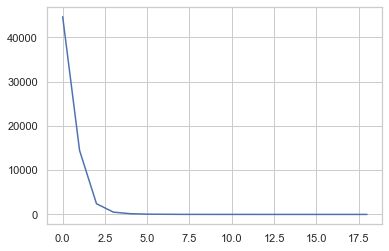

In [196]:
b2 = b.groupby(["sum"])['sum'].count()
plt.plot(b2);

In [197]:
b2

sum
0     44637
1     14438
2      2415
3       516
4       162
5        58
6        33
7        13
8         9
9         3
10        4
11        4
12        1
13        1
14        1
15        1
16        1
18        1
Name: sum, dtype: int64

In [198]:
b3 = pd.crosstab(index=b['count'], columns=b['sum'], margins=True)
b3

sum,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,All
count,,,,,,,,,,,,,,,,,,,
1,30801,7119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37920
2,8980,4080,835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13895
3,2968,1743,658,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5499
4,1038,767,400,123,41,0,0,0,0,0,0,0,0,0,0,0,0,0,2369
5,425,353,222,83,28,6,0,0,0,0,0,0,0,0,0,0,0,0,1117
6,188,155,112,59,27,7,5,0,0,0,0,0,0,0,0,0,0,0,553
7,83,87,67,31,14,16,7,2,0,0,0,0,0,0,0,0,0,0,307
8,58,45,39,27,13,6,10,2,1,0,0,0,0,0,0,0,0,0,201
9,27,21,20,17,9,4,2,1,2,1,0,0,0,0,0,0,0,0,104


In [199]:
pt = b.loc[b['sum'] == 18].index
a.loc[a['PatientId'] == pt[0]].sort_values(by=['ApptDay','SchedDay','SchedTime'])
#many appointments seem to be scheduled on the same day close together - could these be a rescheduling
#or an override? can't confirm because we don't have the appointment date...

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No_show,No_show_num,SchedDay,SchedTime,SchedDayofWeek,ApptDay,ApptDayofWeek,DayDiff
53218,1.421987e+12,5660212,M,2016-05-04T15:50:42Z,2016-05-04T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,1,0,Yes,1,2016-05-04,15:50:42,Wednesday,2016-05-04,Wednesday,0 days
53323,1.421987e+12,5660224,M,2016-05-04T15:51:21Z,2016-05-04T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,1,0,Yes,1,2016-05-04,15:51:21,Wednesday,2016-05-04,Wednesday,0 days
53400,1.421987e+12,5660301,M,2016-05-04T16:05:24Z,2016-05-04T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,1,0,Yes,1,2016-05-04,16:05:24,Wednesday,2016-05-04,Wednesday,0 days
53418,1.421987e+12,5660316,M,2016-05-04T16:07:01Z,2016-05-04T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,1,0,Yes,1,2016-05-04,16:07:01,Wednesday,2016-05-04,Wednesday,0 days
70935,1.421987e+12,5660323,M,2016-05-04T16:08:03Z,2016-05-04T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,1,0,Yes,1,2016-05-04,16:08:03,Wednesday,2016-05-04,Wednesday,0 days
53206,1.421987e+12,5683659,M,2016-05-11T07:44:50Z,2016-05-11T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,1,0,Yes,1,2016-05-11,07:44:50,Wednesday,2016-05-11,Wednesday,0 days
53387,1.421987e+12,5683709,M,2016-05-11T07:47:24Z,2016-05-11T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,1,0,Yes,1,2016-05-11,07:47:24,Wednesday,2016-05-11,Wednesday,0 days
70914,1.421987e+12,5683830,M,2016-05-11T07:55:08Z,2016-05-11T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,1,0,Yes,1,2016-05-11,07:55:08,Wednesday,2016-05-11,Wednesday,0 days
70906,1.421987e+12,5740886,M,2016-05-25T16:28:35Z,2016-05-25T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,1,0,Yes,1,2016-05-25,16:28:35,Wednesday,2016-05-25,Wednesday,0 days
53381,1.421987e+12,5740918,M,2016-05-25T16:34:32Z,2016-05-25T00:00:00Z,9,SÃO BENEDITO,0,0,0,...,1,0,Yes,1,2016-05-25,16:34:32,Wednesday,2016-05-25,Wednesday,0 days


In [200]:
# what to do about these appointments that all seem to be on the same date, scheduled close together?
# keep if we think they could each be individual appointments
# or keep only one per day - the last one they scheduled?

In [201]:
# potential features..
# number of prior appointments? 
# number of total prior no-shows? 
# if the prior appointment was a no-show?
# if the appoint is the first appointment?

In [202]:
# What's the distribution of the number of appointments a person can have in one day?
c = a.groupby(['PatientId','ApptDay'],as_index=False)["No_show_num"].agg(["sum","count"])

In [203]:
c['count'].value_counts()

1     94323
2      6531
3       739
4       157
5        33
6        18
10        1
8         1
Name: count, dtype: int64

In [204]:
pt = c.loc[c['count'] == 10].index
a.loc[(a['PatientId'] == pt[0][0]) & (a['ApptDay'] == pt[0][1])].sort_values(by=['ApptDay','SchedDay','SchedTime'])
#there are definitely duplicates in this data by schedule time - have to remove these

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No_show,No_show_num,SchedDay,SchedTime,SchedDayofWeek,ApptDay,ApptDayofWeek,DayDiff
68241,6.793575e+13,5634503,F,2016-04-28T11:04:33Z,2016-05-06T00:00:00Z,55,CARATOÍRA,0,1,0,...,0,0,No,0,2016-04-28,11:04:33,Thursday,2016-05-06,Friday,8 days
68246,6.793575e+13,5634504,F,2016-04-28T11:04:33Z,2016-05-06T00:00:00Z,55,CARATOÍRA,0,1,0,...,0,0,No,0,2016-04-28,11:04:33,Thursday,2016-05-06,Friday,8 days
37512,6.793575e+13,5634522,F,2016-04-28T11:06:57Z,2016-05-06T00:00:00Z,55,CARATOÍRA,0,1,0,...,0,0,No,0,2016-04-28,11:06:57,Thursday,2016-05-06,Friday,8 days
37514,6.793575e+13,5634523,F,2016-04-28T11:06:57Z,2016-05-06T00:00:00Z,55,CARATOÍRA,0,1,0,...,0,0,No,0,2016-04-28,11:06:57,Thursday,2016-05-06,Friday,8 days
37516,6.793575e+13,5634524,F,2016-04-28T11:06:57Z,2016-05-06T00:00:00Z,55,CARATOÍRA,0,1,0,...,0,0,No,0,2016-04-28,11:06:57,Thursday,2016-05-06,Friday,8 days
37518,6.793575e+13,5634526,F,2016-04-28T11:06:57Z,2016-05-06T00:00:00Z,55,CARATOÍRA,0,1,0,...,0,0,No,0,2016-04-28,11:06:57,Thursday,2016-05-06,Friday,8 days
37520,6.793575e+13,5634525,F,2016-04-28T11:06:57Z,2016-05-06T00:00:00Z,55,CARATOÍRA,0,1,0,...,0,0,No,0,2016-04-28,11:06:57,Thursday,2016-05-06,Friday,8 days
37524,6.793575e+13,5634527,F,2016-04-28T11:06:57Z,2016-05-06T00:00:00Z,55,CARATOÍRA,0,1,0,...,0,0,No,0,2016-04-28,11:06:57,Thursday,2016-05-06,Friday,8 days
37527,6.793575e+13,5634528,F,2016-04-28T11:06:57Z,2016-05-06T00:00:00Z,55,CARATOÍRA,0,1,0,...,0,0,No,0,2016-04-28,11:06:57,Thursday,2016-05-06,Friday,8 days
68243,6.793575e+13,5664829,F,2016-05-05T13:34:32Z,2016-05-06T00:00:00Z,55,CARATOÍRA,0,1,0,...,0,0,No,0,2016-05-05,13:34:32,Thursday,2016-05-06,Friday,1 days


In [205]:
#unique appointments
c_1 = a.groupby(['PatientId','AppointmentID'],as_index=False)['No_show_num'].agg(["count","sum"])
c_1.shape

(110521, 2)

In [206]:
#unique appointment days
c_2 = a.groupby(['PatientId','ApptDay'],as_index=False)["No_show_num"].agg(["count",'sum'])
c_2.shape

(101803, 2)

In [207]:
c_1.shape[0] - c_2.shape[0]
#only around 9k appointment days with multiple appointments - we could just drop these and keep the latest


8718

In [208]:
#for multi-appt days, are some missed and some not?
c_3 = c_2.loc[(c_2['count'] != c_2['sum']) & (c_2['count'] > 1) & (c_2['sum'] > 0)]
print(c_3.shape)
c_3.head(5)
#about 1300 are missed

(1341, 2)


,,count,sum
PatientId,ApptDay,,
7.571455e+08,2016-05-19,2,1
1.257287e+09,2016-05-10,3,1
1.976946e+09,2016-06-06,2,1
2.237714e+09,2016-05-03,2,1
2.639487e+09,2016-06-01,2,1


In [209]:
num=9
a.loc[(a['PatientId'] == c_3.index[num][0]) & (a['ApptDay'] == c_3.index[num][1])].sort_values(by=['ApptDay','SchedDay','SchedTime'])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No_show,No_show_num,SchedDay,SchedTime,SchedDayofWeek,ApptDay,ApptDayofWeek,DayDiff
51189,1.257179e+10,5731275,F,2016-05-24T09:47:11Z,2016-05-30T00:00:00Z,16,REDENÇÃO,0,0,0,...,0,0,Yes,1,2016-05-24,09:47:11,Tuesday,2016-05-30,Monday,6 days
24653,1.257179e+10,5744255,F,2016-05-30T10:01:36Z,2016-05-30T00:00:00Z,16,REDENÇÃO,0,0,0,...,0,0,No,0,2016-05-30,10:01:36,Monday,2016-05-30,Monday,0 days


In [210]:
# remove same-day appointments (appointments scheduled and booked on the same day)
a_df = a.loc[a['DayDiff'] > dt.timedelta(0)]
a_df.shape

(71959, 21)

In [211]:
# remove days with multiple appointments
#unique appointment days
c_2 = a_df.groupby(['PatientId','ApptDay'],as_index=False)["No_show_num"].agg(["count",'sum']).reset_index()
c_2.head()

,PatientId,ApptDay,count,sum
0,3.921784e+04,2016-06-03,1,0
1,1.417242e+05,2016-05-02,1,0
2,5.376153e+05,2016-05-06,1,0
3,5.628261e+06,2016-05-13,1,1
4,2.263866e+07,2016-05-03,1,0


In [212]:
#for multi-appt days, are some missed and some not?
c_3 = c_2.loc[(c_2['count'] != c_2['sum']) & (c_2['count'] > 1) & (c_2['sum'] > 0)]
print(c_3.shape)
c_3.head(5)

(359, 4)


,PatientId,ApptDay,count,sum
169,2.237714e+09,2016-05-03,2,1
208,2.639487e+09,2016-06-01,2,1
404,6.392484e+09,2016-05-06,3,1
616,9.451329e+09,2016-05-03,2,1
780,1.456915e+10,2016-06-06,2,1


In [213]:
a_df = a_df.merge(c_3, how = 'outer', right_on = ['PatientId','ApptDay'], left_on = ['PatientId','ApptDay'])
a_df.shape

(71959, 23)

In [214]:
a_df = a_df.loc[(a_df['count'].isnull()) & a_df['sum'].isnull()]
a_df.drop(columns = ['count','sum'], inplace=True)
a_df.shape

(71194, 21)

In [215]:
# a_df.reset_index().drop(['index'],axis=1,inplace=True)
# a_df

In [216]:
# What's the distribution of the number of appointments a person can have in one day?
c_4 = a_df.groupby(['PatientId'],as_index=False)["No_show_num"].agg(["sum","count"]).reset_index()
c_4['count'].value_counts().sort_index()

1     31194
2      9168
3      3025
4      1156
5       522
6       248
7       132
8        90
9        42
10       61
11       30
12       17
13       17
14       10
15        7
16        4
17        4
18        2
19        1
20        1
28        1
Name: count, dtype: int64

In [217]:
a_df['DayDiff'] = [x.days for x in a_df['DayDiff']]

In [218]:
a_df['ApptDayofWeek'].value_counts()
a_df = a_df.loc[a_df['ApptDayofWeek'] != 'Saturday']

In [219]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71163 entries, 0 to 71958
Data columns (total 21 columns):
PatientId         71163 non-null float64
AppointmentID     71163 non-null int64
Gender            71163 non-null object
ScheduledDay      71163 non-null object
AppointmentDay    71163 non-null object
Age               71163 non-null int64
Neighbourhood     71163 non-null object
Scholarship       71163 non-null int64
Hipertension      71163 non-null int64
Diabetes          71163 non-null int64
Alcoholism        71163 non-null int64
Handcap           71163 non-null int64
SMS_received      71163 non-null int64
No_show           71163 non-null object
No_show_num       71163 non-null int64
SchedDay          71163 non-null datetime64[ns]
SchedTime         71163 non-null object
SchedDayofWeek    71163 non-null object
ApptDay           71163 non-null datetime64[ns]
ApptDayofWeek     71163 non-null object
DayDiff           71163 non-null int64
dtypes: datetime64[ns](2), float64(1), int64

In [220]:
crosstab('Gender',a_df)

No_show,No,Yes,All,no_p,yes_p
Gender,,,,,
F,34128,13415,47543,0.717834,0.282166
M,16907,6713,23620,0.715792,0.284208
All,51035,20128,71163,0.717156,0.282844


In [221]:
crosstab('Age',a_df)

No_show,No,Yes,All,no_p,yes_p
Age,,,,,
0,1535,580,2115,0.725768,0.274232
1,688,387,1075,0.640000,0.360000
2,491,220,711,0.690577,0.309423
3,546,255,801,0.681648,0.318352
4,482,256,738,0.653117,0.346883
...,...,...,...,...,...
98,4,1,5,0.800000,0.200000
100,4,0,4,1.000000,0.000000
102,1,0,1,1.000000,0.000000


In [222]:
a_df['Age'].describe()

count    71163.000000
mean        38.488006
std         22.937097
min          0.000000
25%         19.000000
50%         39.000000
75%         57.000000
max        115.000000
Name: Age, dtype: float64

In [223]:
crosstab('SchedDayofWeek',a_df)

No_show,No,Yes,All,no_p,yes_p
SchedDayofWeek,,,,,
Friday,8822,3453,12275,0.718697,0.281303
Monday,10578,4200,14778,0.715794,0.284206
Saturday,15,1,16,0.937500,0.062500
Thursday,8647,3377,12024,0.719145,0.280855
Tuesday,12030,4770,16800,0.716071,0.283929
Wednesday,10943,4327,15270,0.716634,0.283366
All,51035,20128,71163,0.717156,0.282844


In [224]:
crosstab('ApptDayofWeek',a_df)

No_show,No,Yes,All,no_p,yes_p
ApptDayofWeek,,,,,
Friday,8779,3613,12392,0.708441,0.291559
Monday,10101,4330,14431,0.699951,0.300049
Thursday,8180,3031,11211,0.729641,0.270359
Tuesday,11644,4612,16256,0.716289,0.283711
Wednesday,12331,4542,16873,0.730813,0.269187
All,51035,20128,71163,0.717156,0.282844


In [225]:
crosstab('Scholarship',a_df)

No_show,No,Yes,All,no_p,yes_p
Scholarship,,,,,
0,46729,17827,64556,0.723852,0.276148
1,4306,2301,6607,0.651733,0.348267
All,51035,20128,71163,0.717156,0.282844


In [226]:
crosstab('Hipertension',a_df)

No_show,No,Yes,All,no_p,yes_p
Hipertension,,,,,
0,39646,16694,56340,0.703692,0.296308
1,11389,3434,14823,0.768333,0.231667
All,51035,20128,71163,0.717156,0.282844


In [227]:
crosstab('Diabetes',a_df)

No_show,No,Yes,All,no_p,yes_p
Diabetes,,,,,
0,47041,18827,65868,0.714171,0.285829
1,3994,1301,5295,0.754297,0.245703
All,51035,20128,71163,0.717156,0.282844


In [228]:
crosstab('Alcoholism',a_df)

No_show,No,Yes,All,no_p,yes_p
Alcoholism,,,,,
0,49854,19524,69378,0.718585,0.281415
1,1181,604,1785,0.661625,0.338375
All,51035,20128,71163,0.717156,0.282844


In [229]:
crosstab('Handcap',a_df)

No_show,No,Yes,All,no_p,yes_p
Handcap,,,,,
0,50069,19801,69870,0.716602,0.283398
1,883,293,1176,0.750850,0.249150
2,76,31,107,0.710280,0.289720
3,6,2,8,0.750000,0.250000
4,1,1,2,0.500000,0.500000
All,51035,20128,71163,0.717156,0.282844


In [230]:
crosstab('SMS_received',a_df)

No_show,No,Yes,All,no_p,yes_p
SMS_received,,,,,
0,25458,10474,35932,0.708505,0.291495
1,25577,9654,35231,0.725980,0.274020
All,51035,20128,71163,0.717156,0.282844


In [231]:
crosstab('DayDiff',a_df)

No_show,No,Yes,All,no_p,yes_p
DayDiff,,,,,
1,4070,1086,5156,0.789372,0.210628
2,5095,1567,6662,0.764785,0.235215
3,2066,624,2690,0.768030,0.231970
4,4017,1197,5214,0.770426,0.229574
5,2391,859,3250,0.735692,0.264308
...,...,...,...,...,...
162,9,2,11,0.818182,0.181818
169,7,1,8,0.875000,0.125000
176,10,6,16,0.625000,0.375000


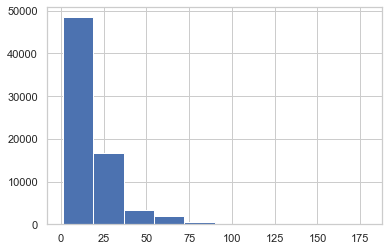

In [232]:
plt.hist(a_df['DayDiff']);

In [233]:
a_df['DayDiff'].describe()

count    71163.000000
mean        15.653949
std         16.507334
min          1.000000
25%          4.000000
50%          9.000000
75%         22.000000
max        179.000000
Name: DayDiff, dtype: float64

In [234]:
d = crosstab('Neighbourhood',a_df).sort_values('All',ascending=False)
d['All'].describe()

count       81.000000
mean      1757.111111
std       7856.924459
min          2.000000
25%        282.000000
50%        659.000000
75%       1359.000000
max      71163.000000
Name: All, dtype: float64

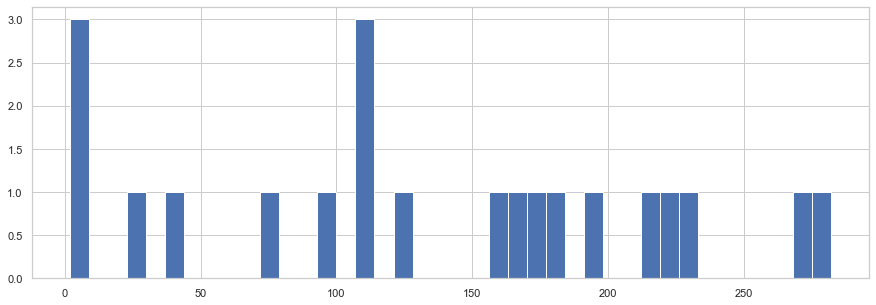

In [235]:
plt.figure(figsize=(15,5))
plt.hist(d['All'][60:81],bins=40);

In [236]:
d[65:].index

Index(['FRADINHOS', 'ANTÔNIO HONÓRIO', 'MÁRIO CYPRESTE', 'ARIOVALDO FAVALESSA',
       'ENSEADA DO SUÁ', 'SANTA HELENA', 'HORTO', 'UNIVERSITÁRIO', 'NAZARETH',
       'SEGURANÇA DO LAR', 'MORADA DE CAMBURI', 'PONTAL DE CAMBURI',
       'ILHA DO BOI', 'ILHA DO FRADE', 'AEROPORTO',
       'ILHAS OCEÂNICAS DE TRINDADE'],
      dtype='object', name='Neighbourhood')

In [237]:
#transformations
#make handcap binary
a_df['Handcap_bin'] = [1 if x>0 else 0 for x in a_df['Handcap']]
#bin daydiff
a_df['DayDiff2'] = [60 if x>=60 else x for x in a_df['DayDiff']]
#bin age
a_df['Age2'] = [85 if x>=85 else x for x in a_df['Age']]
#bin neighborhoods
a_df['Neighbourhood2'] = ['OTHER' if x in d[65:].index else x for x in a_df['Neighbourhood']]

In [238]:
with open('pickles/appt.pickle', 'wb') as to_write:
    pickle.dump(a_df, to_write)